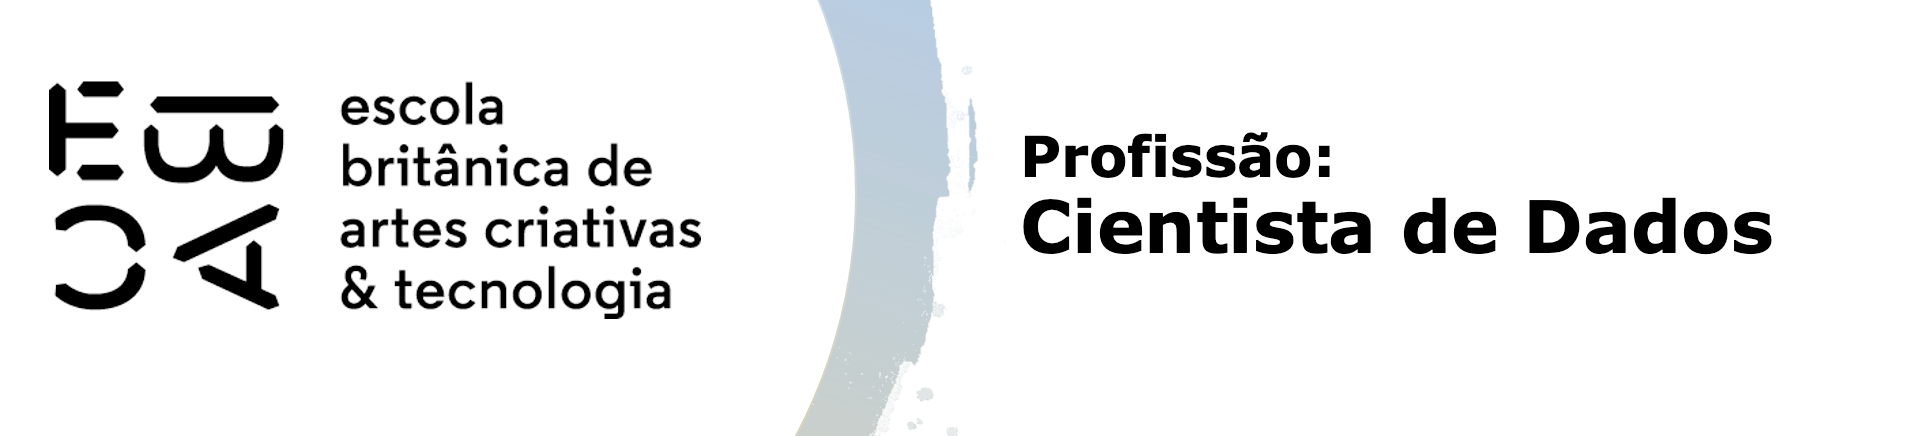

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Gerando o DataFrame
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Visualizando dados
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
# Visualizando tamanho da base de dados
df.shape

(12330, 18)

In [5]:
# Extratificando os acessos (houve compra e não houve compra)
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [6]:
# Separando as variáveis para análise
df_var_1 = df.iloc[:,:6]
df_var_2 = df[['BounceRates','Revenue']]
df_1 = pd.concat([df_var_1,df_var_2], axis=1)
df_1.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  Revenue  
0         0.20    False  
1         0.00    False  
2         0.20    False  
3         0.05    False  
4         0.02    False

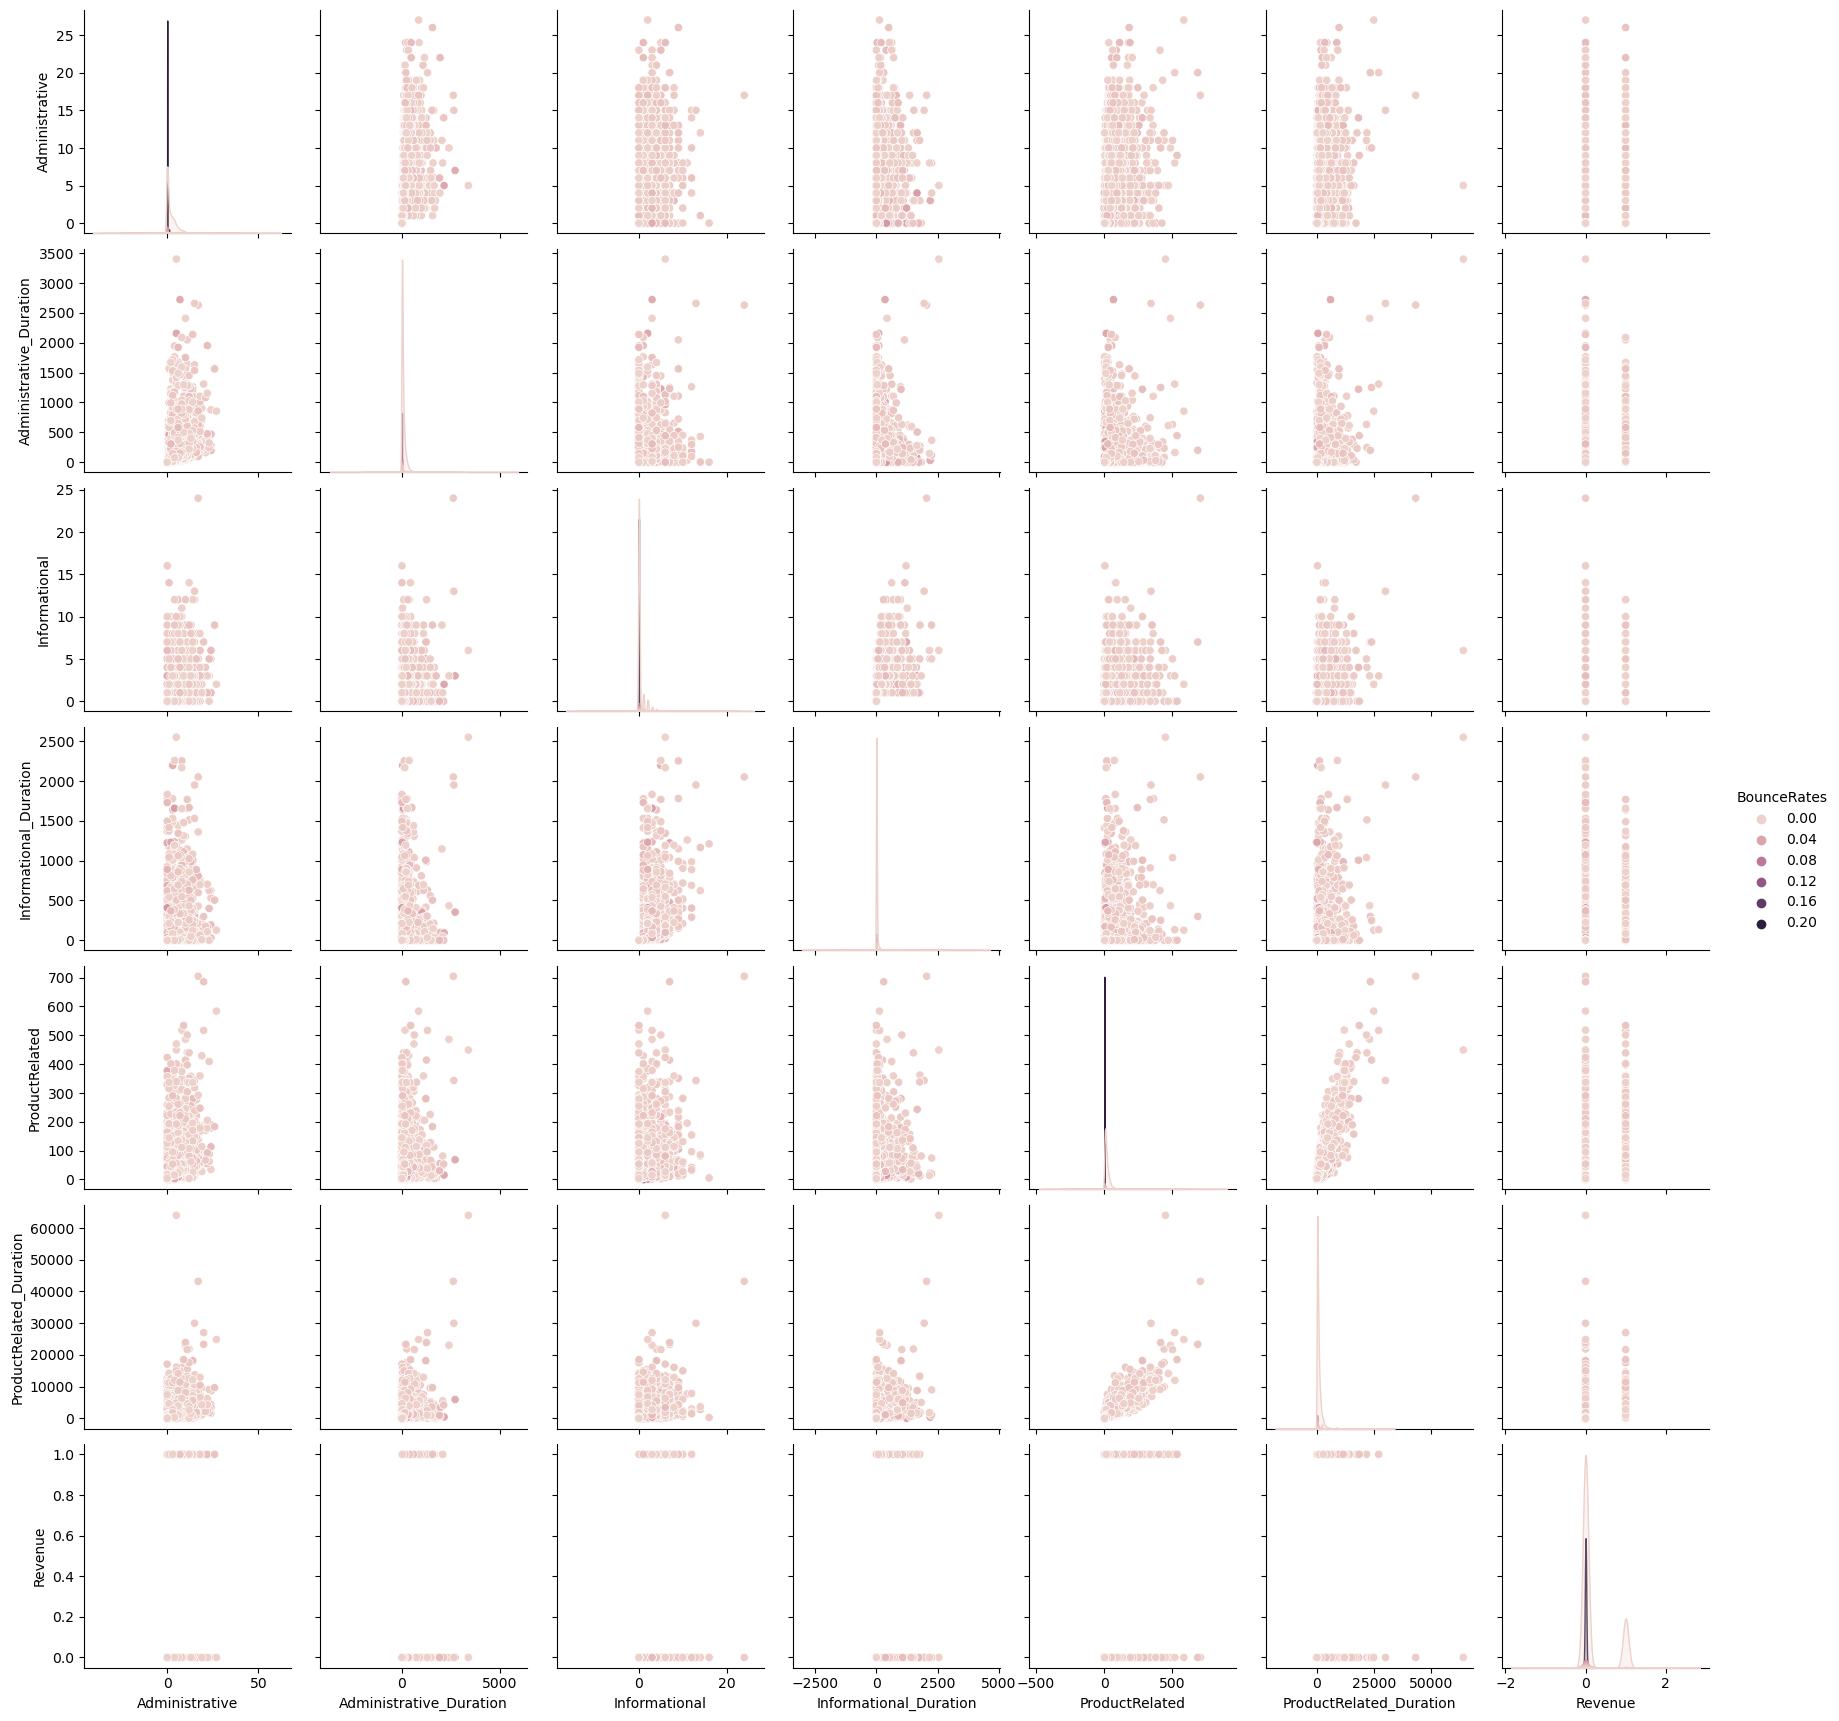

In [7]:
# Verificando a distribuição dessas variáveis
sns.pairplot(df_1, hue='BounceRates')

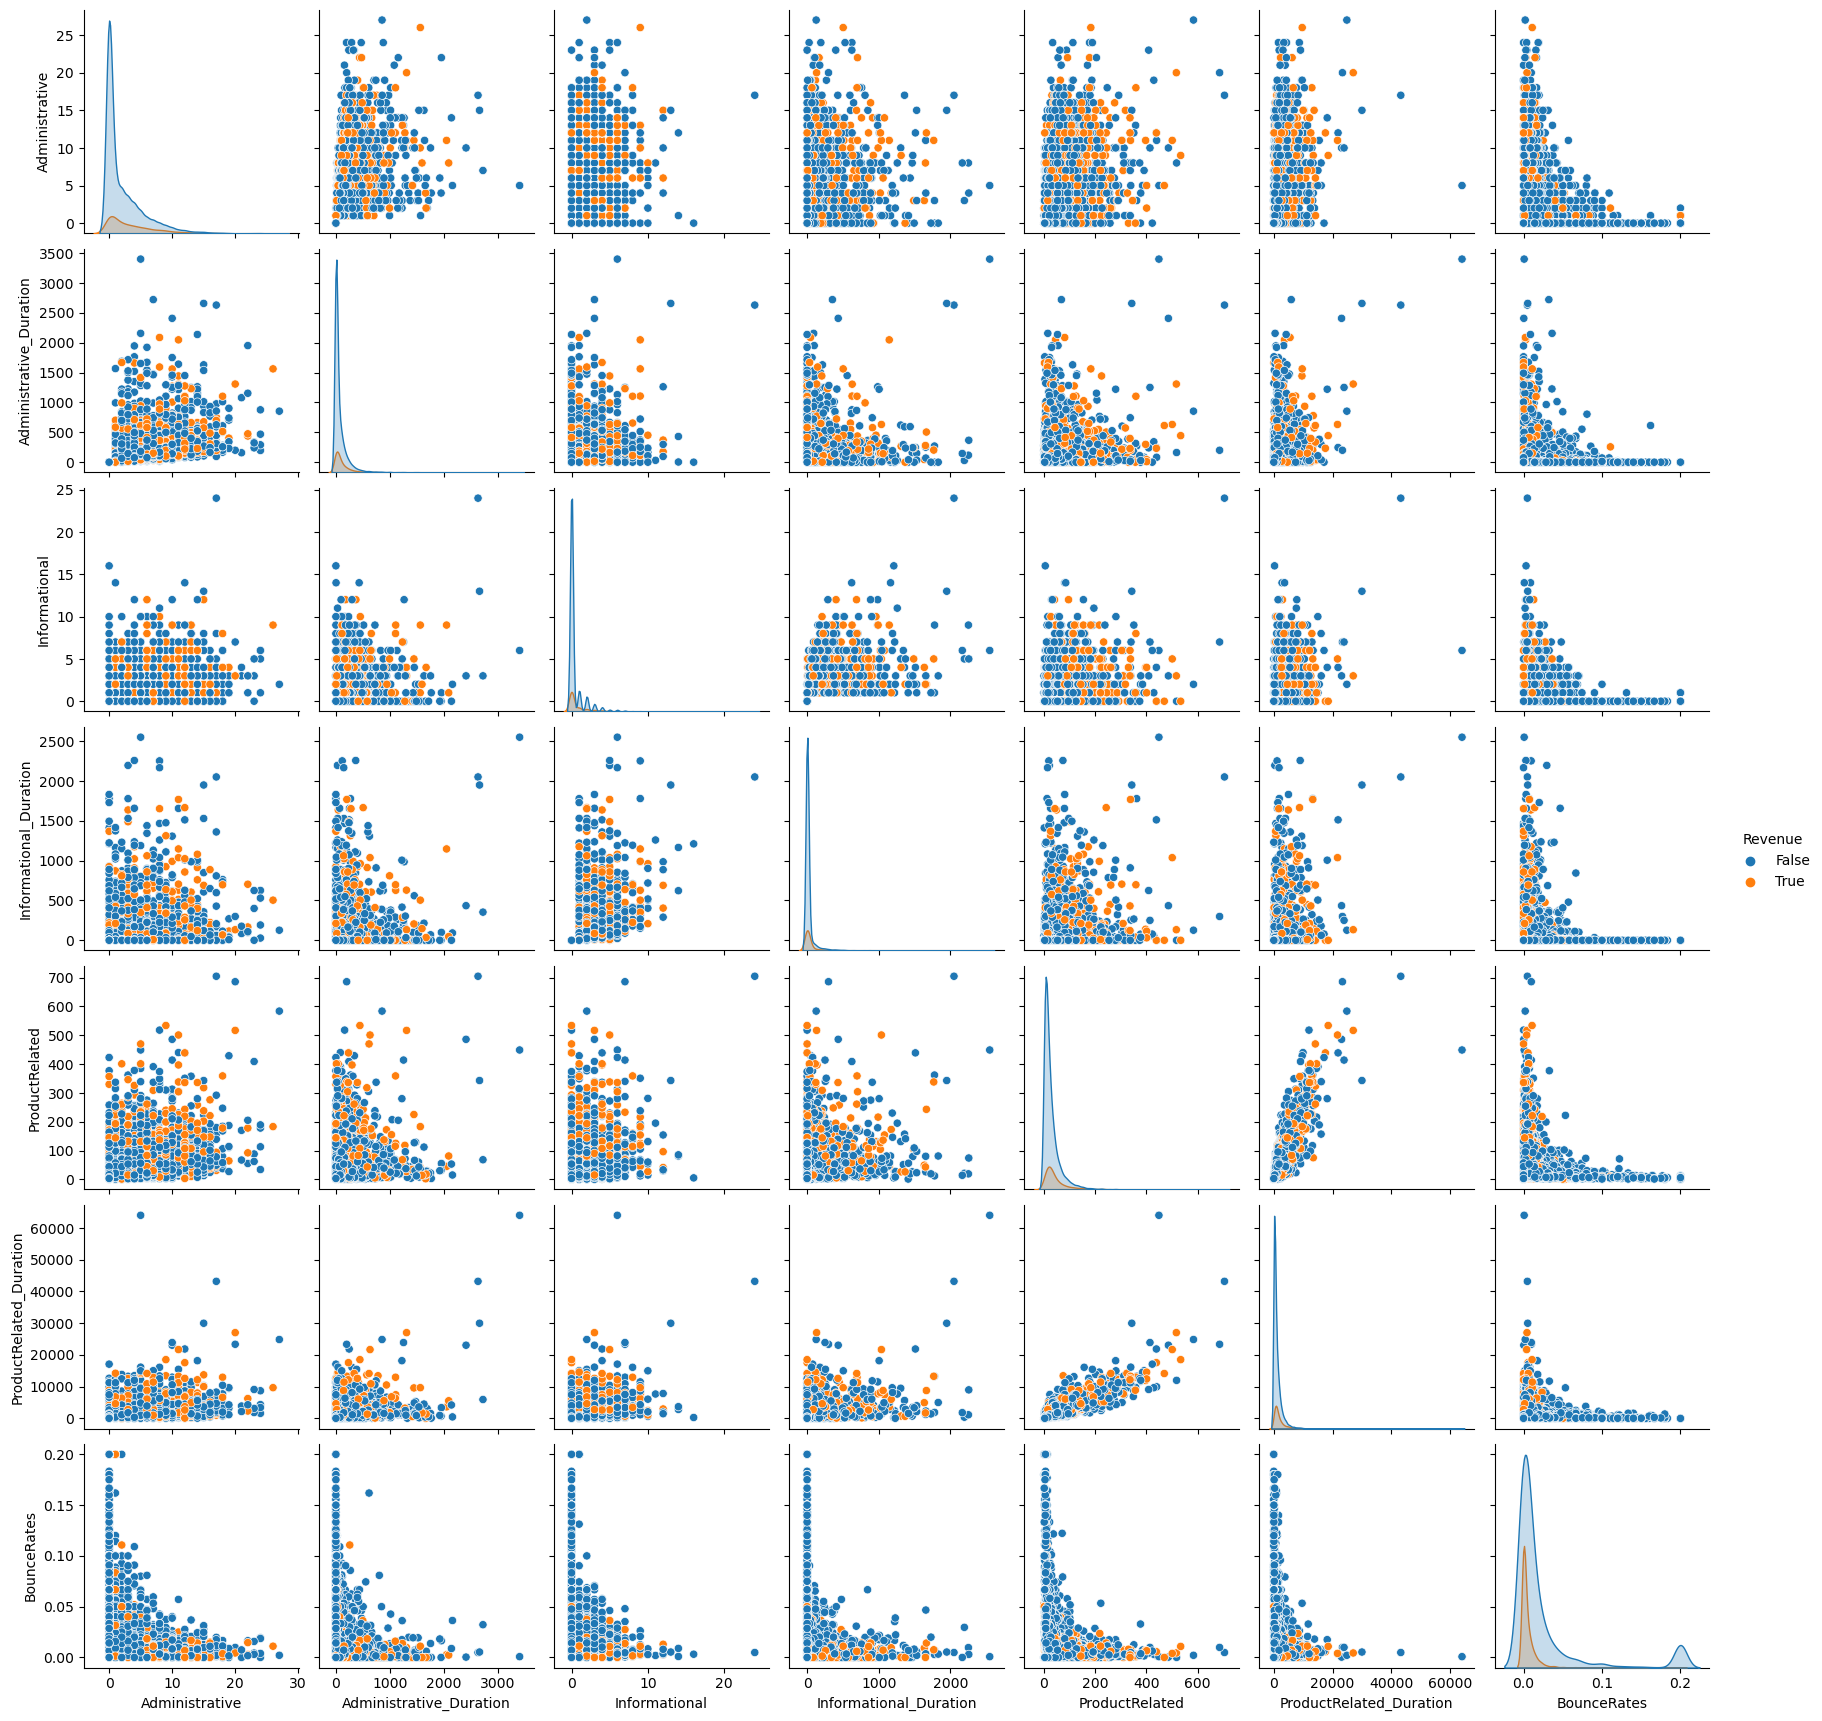

In [8]:
# Verificando a distribuição dessas variáveis
sns.pairplot(df_1, hue='Revenue')

In [9]:
# Procurando valores do tipo 'missing'
df_1.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
Revenue                    0
dtype: int64

**Obs:**
- O percentual de visitantes que entram no site e saem sem acionar outros requests durante a sessão é baixo para todas as variáveis em análise;
- A variável informacional é a que apresenta a menor quantidade de acesso e a ProductRelated a que apresenta a maior; e
- Há necessidade de padronização das variáveis em função da variação das escalas.

In [10]:
# Padronizando as variáveis
padronizador = StandardScaler()
df_padronizado = padronizador.fit_transform(df_1.iloc[:,:6])
df_pd = pd.DataFrame(df_padronizado, columns = df_1.iloc[:,:6].columns)

In [11]:
# Ajustando o novo DataFrame
df_var_pd = pd.concat([df_pd,df_1[['BounceRates','Revenue']]], axis=1)
df_var_pd.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  Revenue  
0         0.20    False  
1         0.00    False  
2         0.20    False  
3         0.05    False  
4         0.02    False

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [12]:
# Inicializando uma lista com os valores da silueta média e do SQD
x = df_var_pd.iloc[:, :6].values
SQD = []
siluetas=[]
for i in range(2, 11):
    km = KMeans(n_clusters = i,
              max_iter = 600,
              n_init = 'auto',
              random_state = 42,
              algorithm = 'lloyd')
    km.fit(x)
    labels = km.labels_
    siluetas.append(silhouette_score(x, km.labels_))
    SQD.append(km.inertia_)
    nomes_grupos = ['grupo_' + str(g) for g in range(i)]
    df_var_pd['grupos_'+str(i)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

[Text(0.5, 0, 'num_clusters'), Text(0, 0.5, 'SQD')]

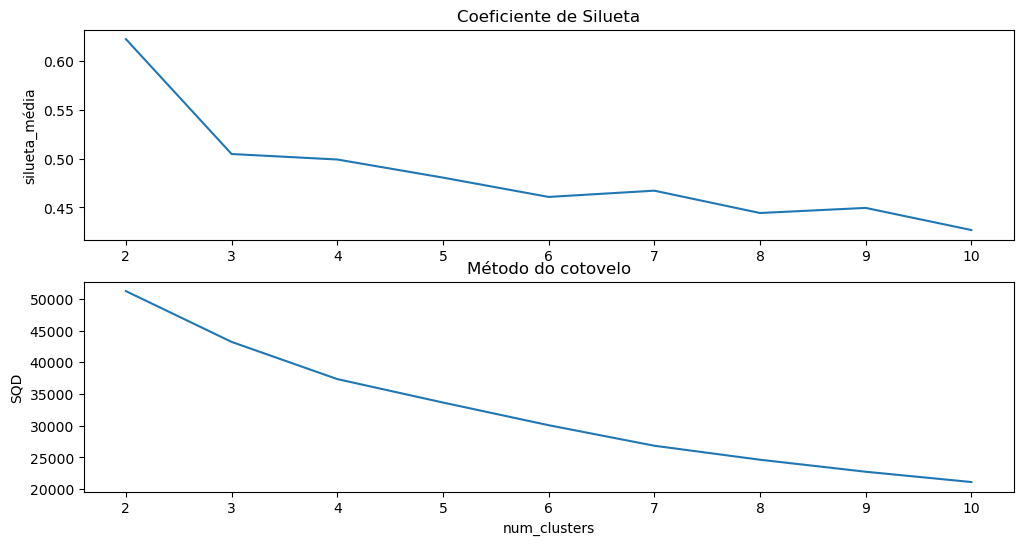

In [13]:
# Visualizando os gráficos
plt.rcParams['figure.figsize'] = (12, 6)
fig,axs=plt.subplots(2,1)
axs[0].plot(range(2,11),siluetas)
axs[0].set_title('Coeficiente de Silueta')
axs[1].plot(range(2,11),SQD)
axs[1].set_title('Método do cotovelo')
axs[0].set(ylabel='silueta_média')
axs[1].set(xlabel='num_clusters',ylabel='SQD')

**Análise:**
- Após aplicação do Coeficiente de Silueta e do Método do Cotovelo, o número de grupo ideal é o igual a **2**.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

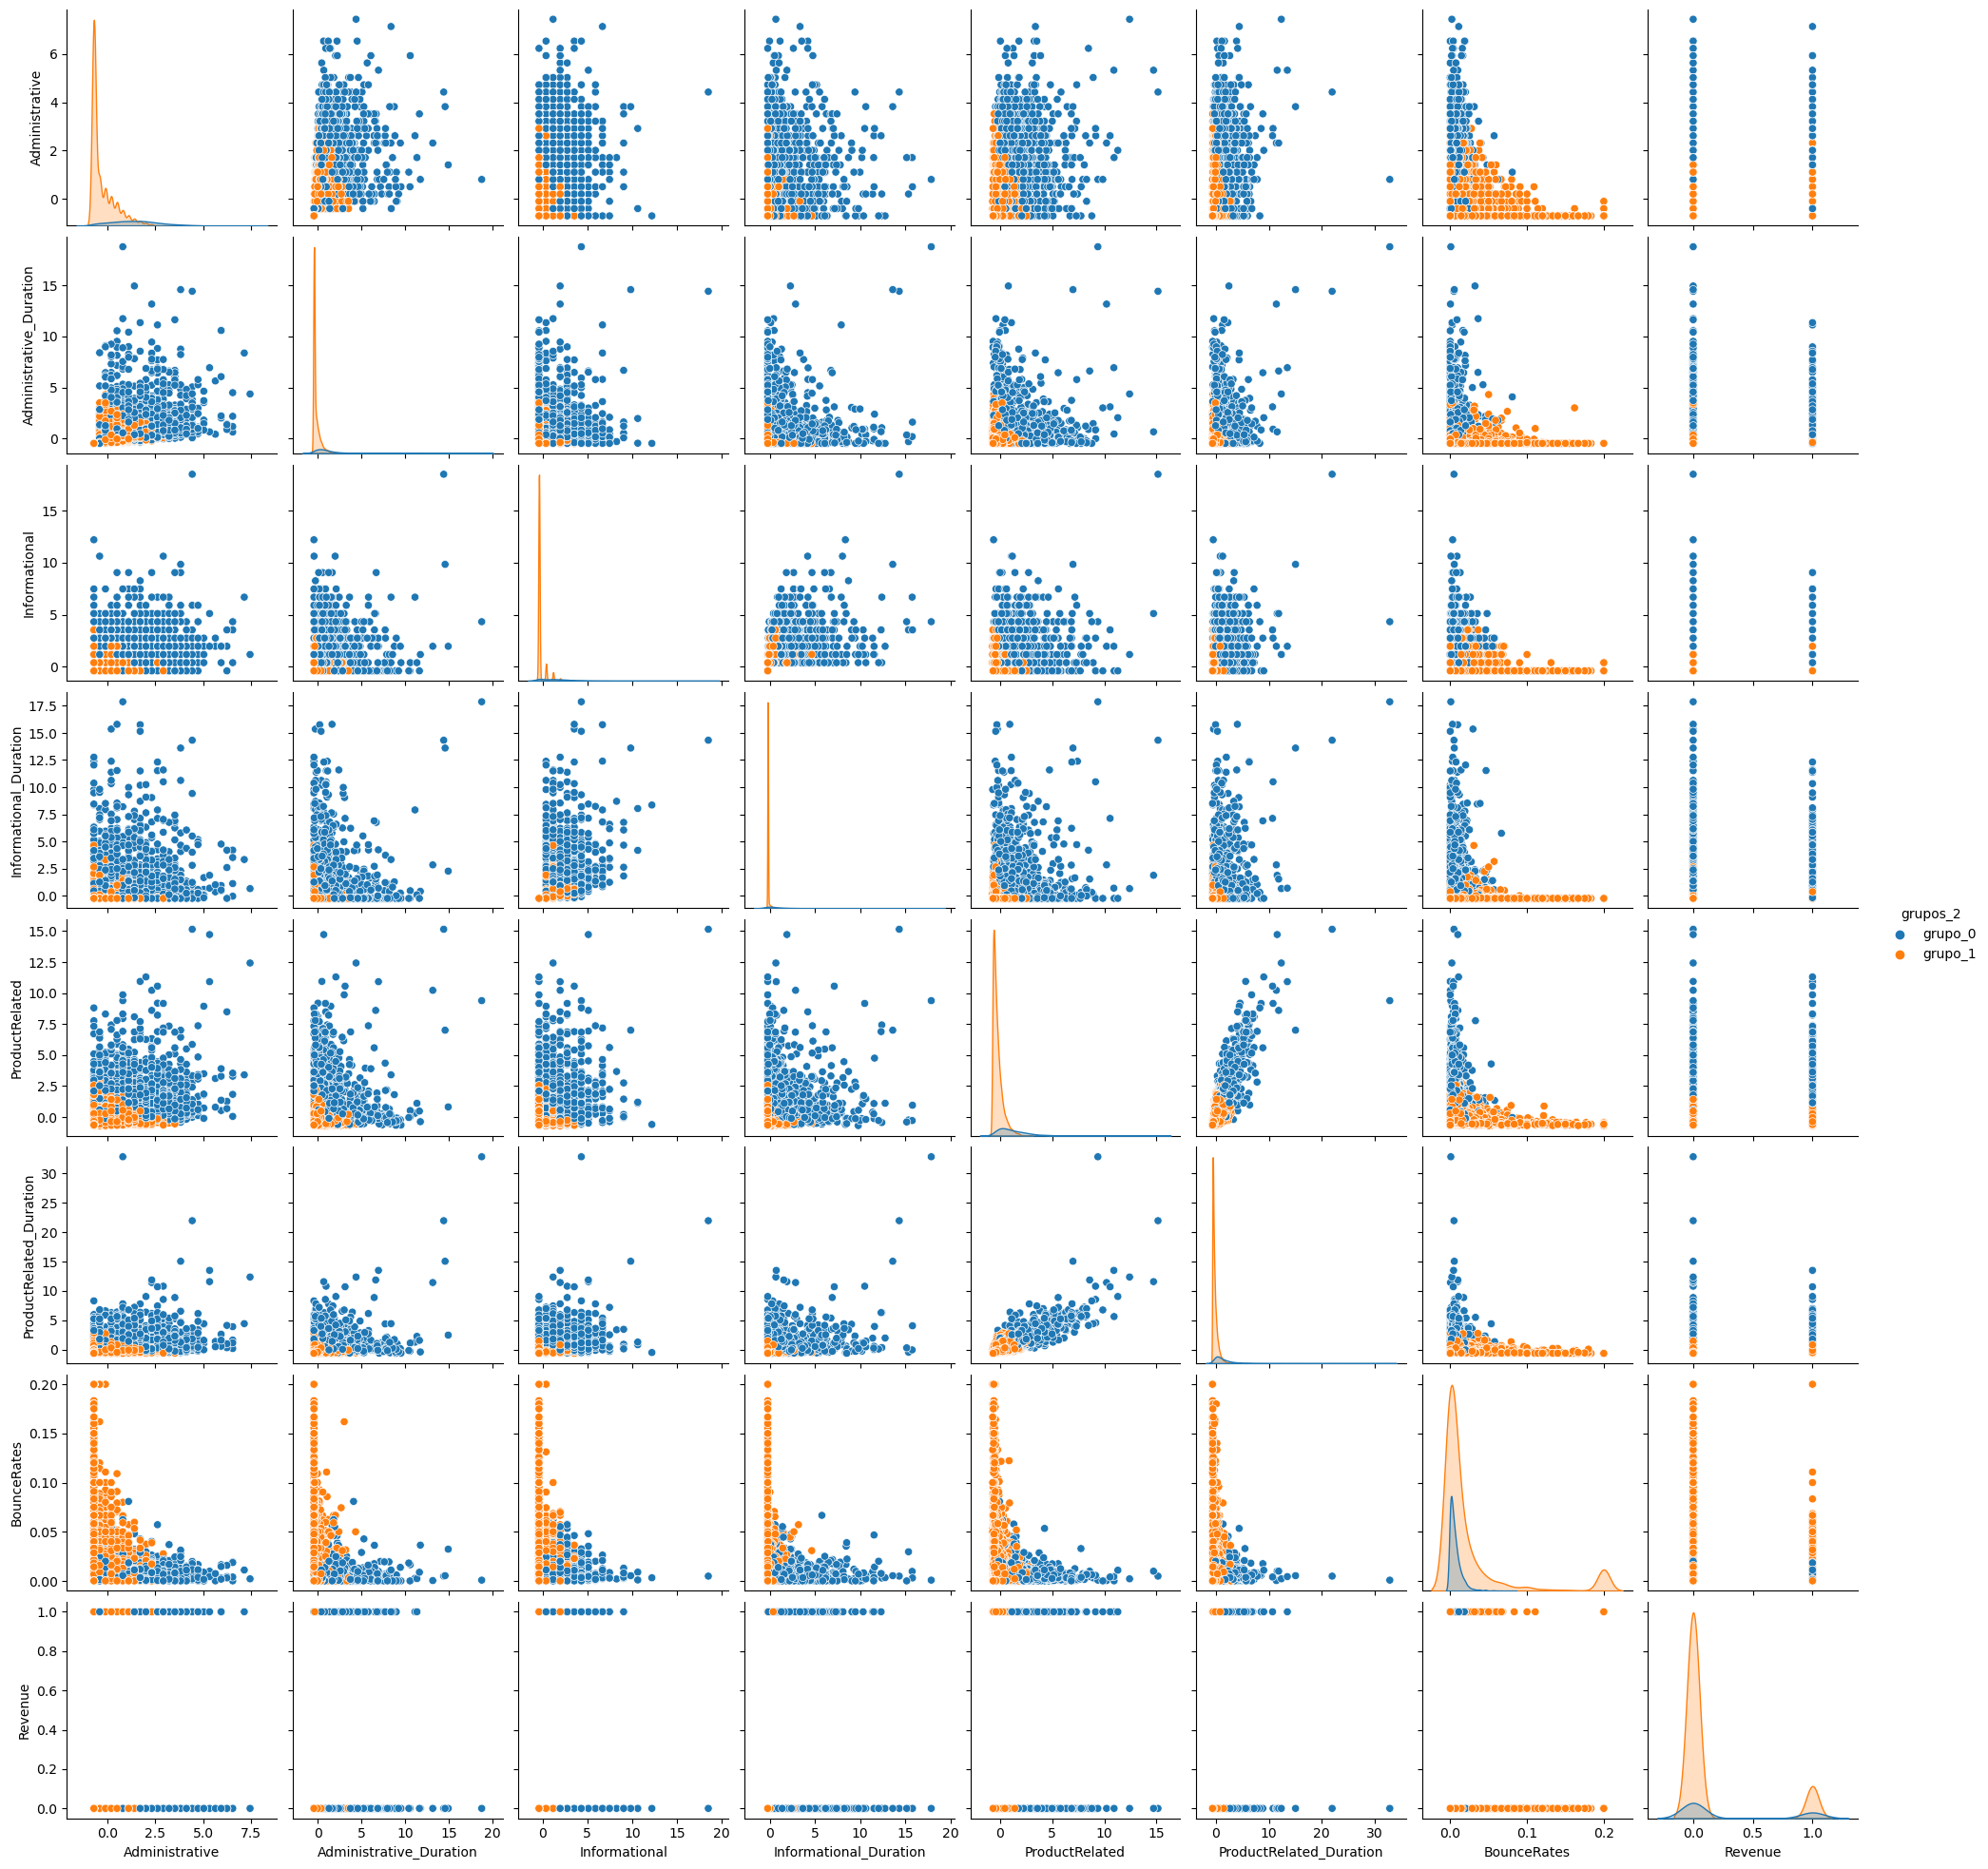

In [14]:
# Verificando a distribuição dessas variáveis com o número de grupo igual a 2
sns.pairplot(df_var_pd, hue='grupos_2')

**Sugestão de nomes para os grupos:**
- grupo_0 - Alto interesse
- grupo_1 - Baixo interesse

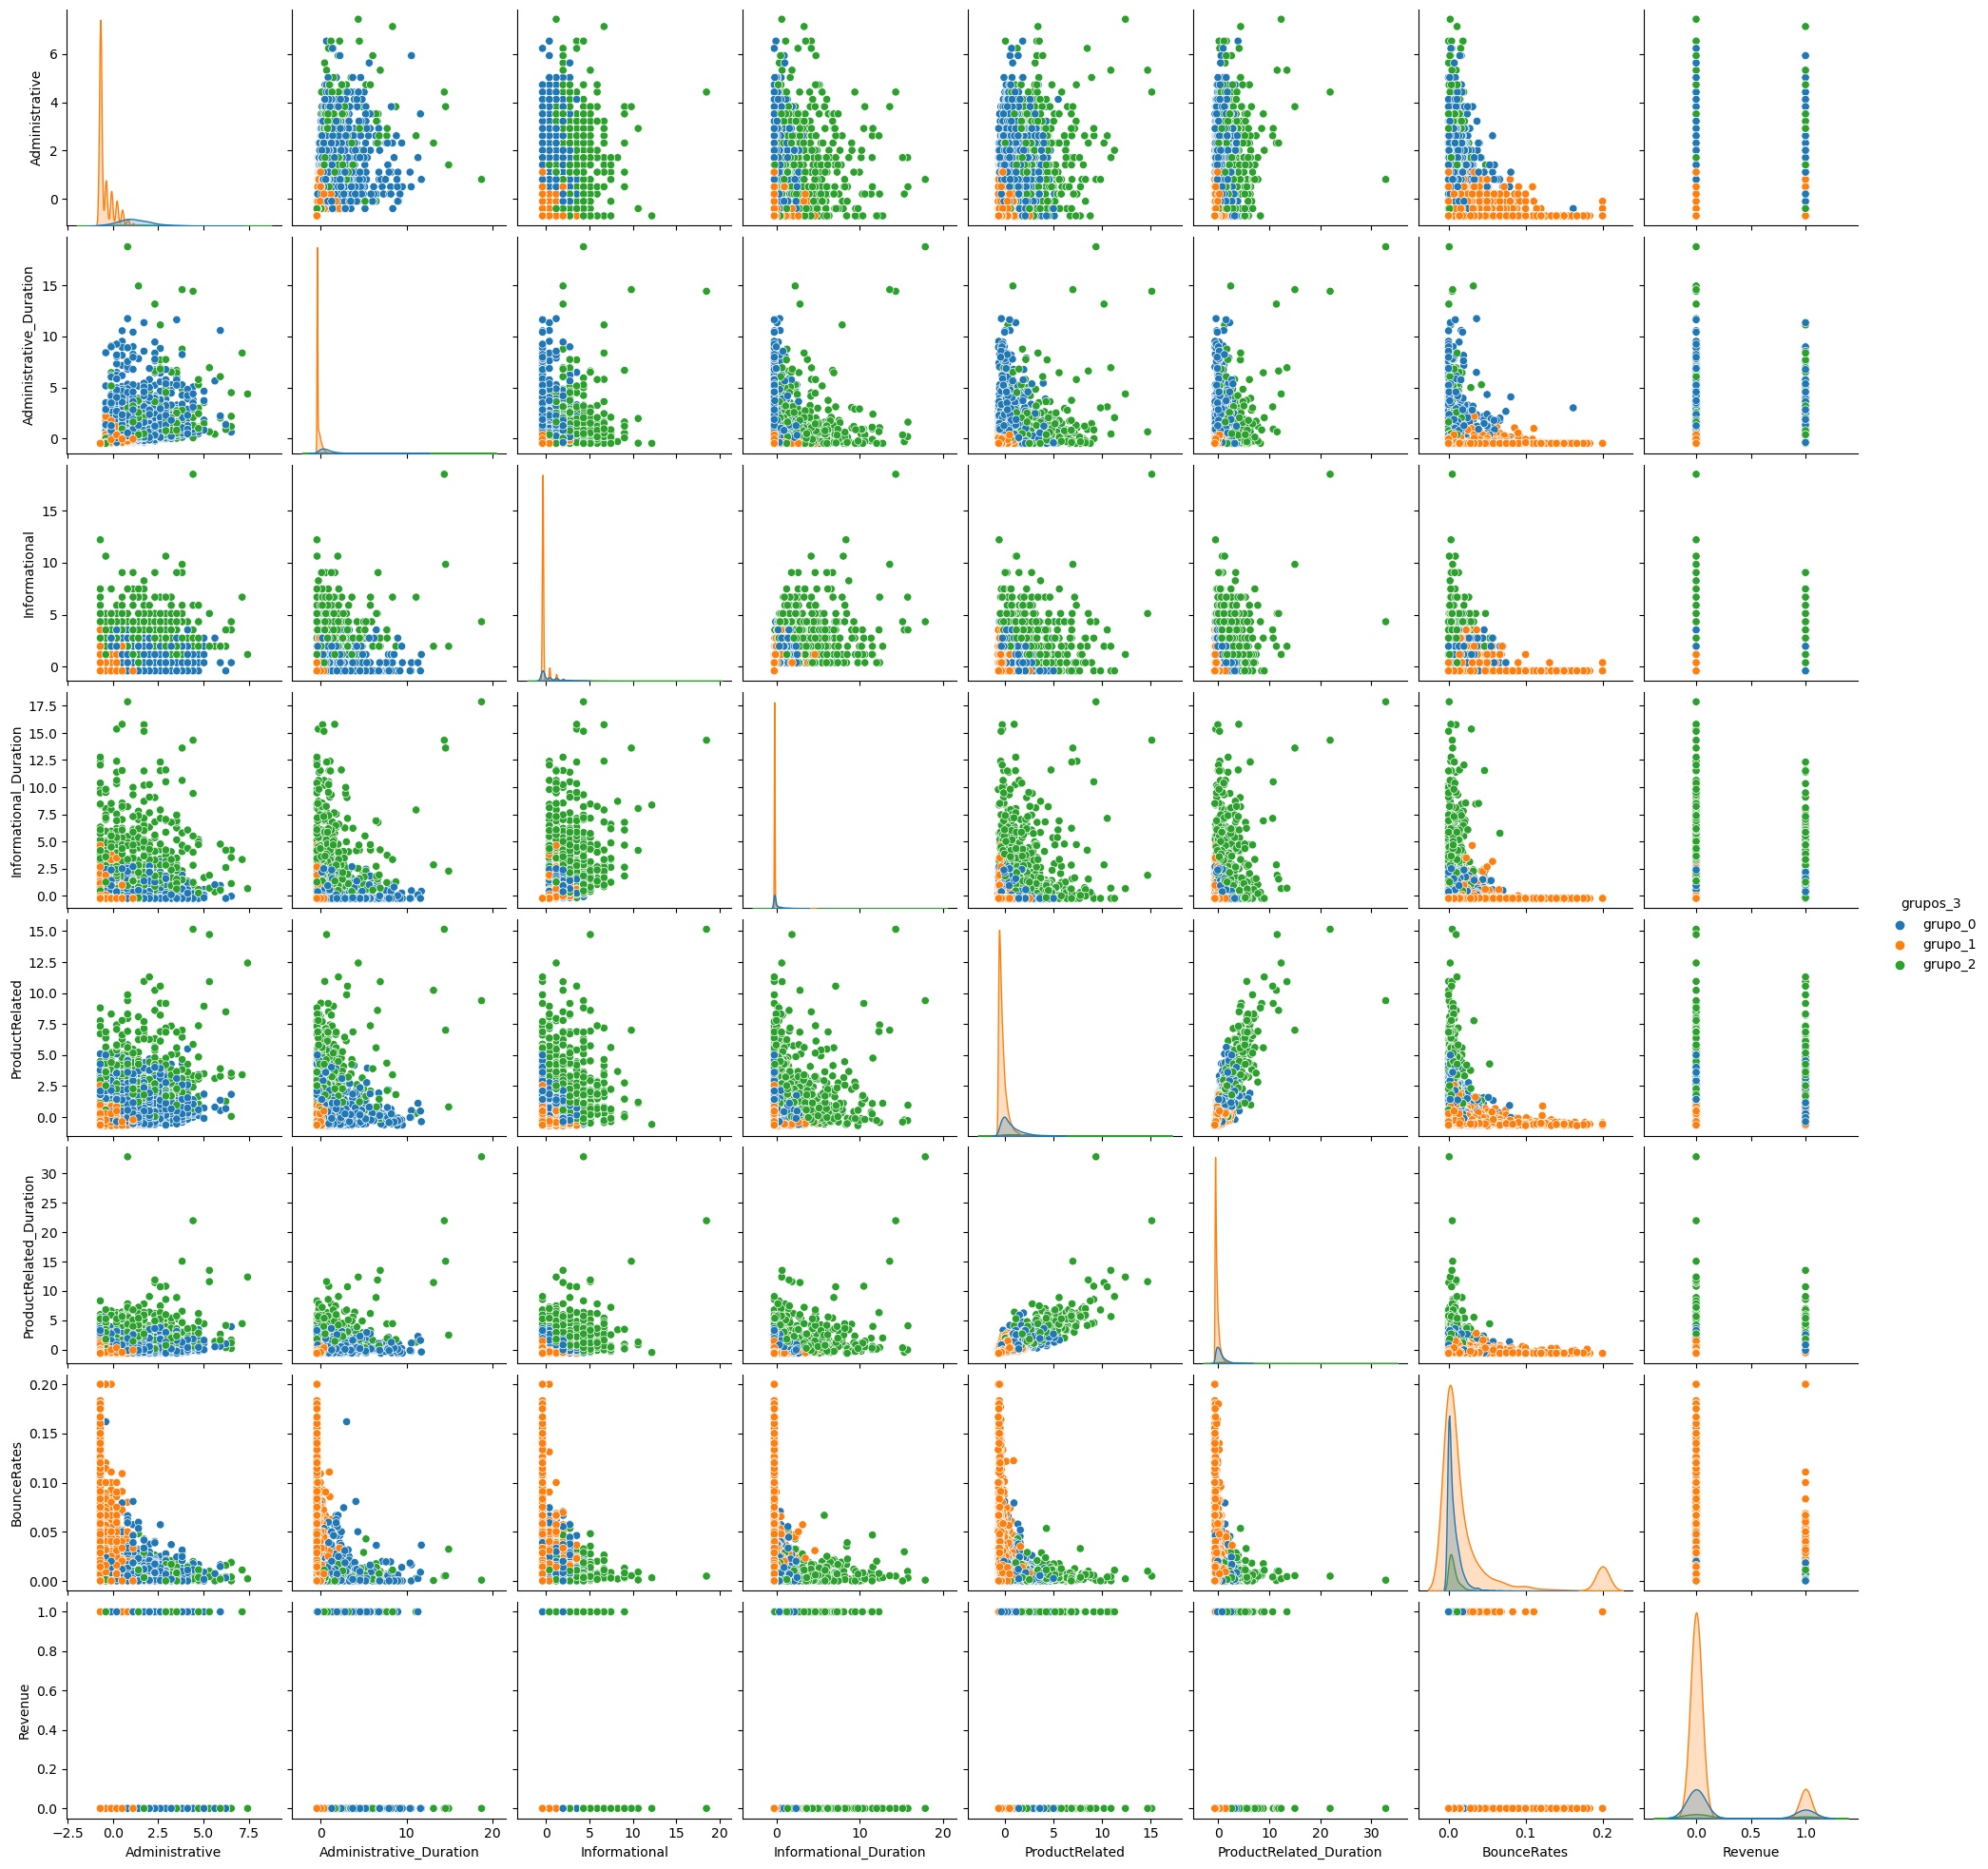

In [15]:
# Verificando a distribuição dessas variáveis com o número de grupo igual a 3
sns.pairplot(df_var_pd, hue='grupos_3')

**Sugestão de nomes para os grupos:**
- grupo_0 - Médio interesse
- grupo_1 - Baixo interesse
- grupo_2 - Alto interesse

In [16]:
# Visualizando o quantitativo de clientes com compras em cada grupo para o agrupamento com 2 grupos
crosstab_g2 = pd.crosstab(df_var_pd['Revenue'], df_var_pd['grupos_2'])
crosstab_g2

grupos_2  grupo_0  grupo_1
Revenue                   
False        1273     9149
True          479     1429

In [17]:
# Visualizando em percentual em relação a variável 'Revenue' para o agrupamento com 2 grupos
crosstab_g2_norm = 100*crosstab_g2.div(crosstab_g2.sum(axis=1), axis=0)
crosstab_g2_norm

grupos_2    grupo_0    grupo_1
Revenue                       
False     12.214546  87.785454
True      25.104822  74.895178

In [18]:
# Visualizando o quantitativo de clientes com compras em cada grupo para o agrupamento com 3 grupos
crosstab_g3 = pd.crosstab(df_var_pd['Revenue'], df_var_pd['grupos_3'])
crosstab_g3

grupos_3  grupo_0  grupo_1  grupo_2
Revenue                            
False        1898     8131      393
True          571     1163      174

In [19]:
# Visualizando em percentual em relação a variável 'Revenue' para o agrupamento com 3 grupos
crosstab_g3_norm = 100*crosstab_g3.div(crosstab_g3.sum(axis=1), axis=0)
crosstab_g3_norm

grupos_3    grupo_0    grupo_1   grupo_2
Revenue                                 
False     18.211476  78.017655  3.770869
True      29.926625  60.953878  9.119497

**Decisão pelo agrupamento final:**
- Com base nas análises acima, o agrupamento com **2 grupos** parece mais aplicável ao caso pois apesar de apresentar para o **grupo de alto interesse** o percentual de **25,10%** dos clientes que realizaram compras, menor que a contribuição dos **grupos de alto e médio interesse** do agrupamento com **3 grupos** que juntos representam **39,04%** dos clientes que realizaram compras; contribui com apenas **12,21%** daqueles que não realizaram compras contra **21,98%** para o outro agrupamento.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

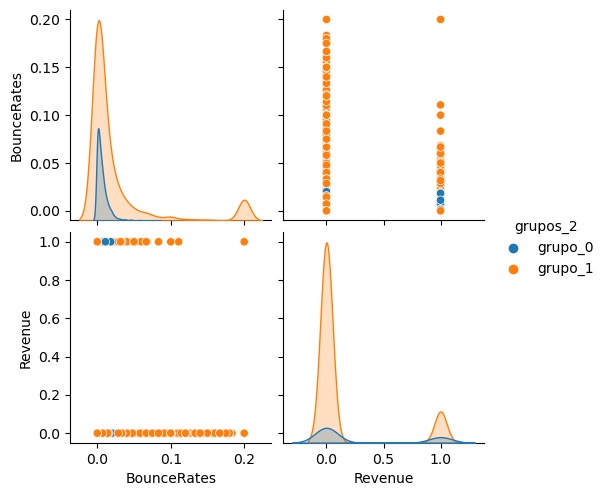

In [20]:
# Visualizando apenas as variáveis fora do escopo: bounce rate e revenue
sns.pairplot(df_var_pd.iloc[:,6:], hue='grupos_2')

In [21]:
# Visualizando em percentual em relação a variável 'Grupo' para o agrupamento escolhido
crosstab_g2_norm2 = 100*crosstab_g2.div(crosstab_g2.sum(axis=0), axis=1)
crosstab_g2_norm2

grupos_2    grupo_0   grupo_1
Revenue                      
False     72.659817  86.49083
True      27.340183  13.50917

**Conclusão:**
- O **grupo_0**, **clientes com alto interesse**, apresentam o maior percentual de acerto (**27,34%**) de clientes mais propensos à compra.